In [1]:
import acquire
import prepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
pd.set_option('display.max_columns', 1000)

In [2]:
df = acquire.get_telco_data()

In [3]:
df.columns

Index(['Unnamed: 0', 'payment_type_id', 'internet_service_type_id',
       'contract_type_id', 'customer_id', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'monthly_charges', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


Does everyone with a partner have dependents?

In [5]:
df[['partner','dependents']]

,partner,dependents
0,Yes,Yes
1,No,No
2,No,No
3,Yes,No
4,Yes,No
...,...,...
7038,No,No
7039,Yes,No
7040,No,No
7041,Yes,Yes


A partner doesn't count as a dependent

In [6]:
def prep_telco(df):
    df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id','customer_id'])
    df['total_charges'] = (df.total_charges + '0').astype('float')
    dummies = df.select_dtypes(include='object').columns
    dummies = pd.get_dummies(df[dummies],drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    return df

In [7]:
df = prep_telco(df)

In [8]:
df.head()

,Unnamed: 0,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,1,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
2,2,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
3,3,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,1,0,0,1,0
4,4,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,0,1


In [9]:
addons = ['phone_service', 'multiple_lines', 'online_security','online_backup', 
          'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
df['addons'] = np.where(df[addons]=='Yes',1,0).sum(axis=1)

In [10]:
np.where(df[addons]=='Yes',1,0).sum(axis=1)

array([4, 3, 2, ..., 2, 5, 5])

In [11]:
df['addons'] = np.where(df[addons]=='Yes',1,0).sum(axis=1)

In [12]:
df.head()

,Unnamed: 0,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,addons
0,0,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,1,0,0,0,0,0,1,4
1,1,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,0,0,0,0,0,0,1,3
2,2,Male,0,No,No,4,Yes,No,No,No,...,1,1,0,0,1,0,0,1,0,2
3,3,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,0,0,1,0,0,1,0,5
4,4,Female,1,Yes,No,3,Yes,No,No,No,...,1,1,0,0,1,0,0,0,1,3


In [13]:
df = acquire.get_telco_data()

def prep_telco(df):
    df = df.drop(columns=['Unnamed: 0','payment_type_id', 'internet_service_type_id', 'contract_type_id','customer_id'])
    df['total_charges'] = (df.total_charges + '0').astype('float')
    addons = ['phone_service', 'multiple_lines', 'online_security','online_backup', 
          'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
    df['addons'] = np.where(df[addons]=='Yes',1,0).sum(axis=1)
    cols_bool = ['senior_citizen','partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines',
             'online_security', 'online_backup', 'device_protection', 'tech_support','streaming_tv', 
             'streaming_movies', 'paperless_billing','churn']
    df[cols_bool] = np.where(df[cols_bool]=='Yes',1,0)
    dummies = df.select_dtypes(include='object').columns
    dummies = pd.get_dummies(df[dummies],drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    return df

In [14]:
df = prep_telco(df)

In [15]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type,addons,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,1,1,0,1,0,0,1,0,...,Mailed check,4,0,1,0,0,0,0,0,1
1,Male,0,0,0,0,1,1,0,0,0,...,Mailed check,3,1,0,0,0,0,0,0,1
2,Male,0,0,0,0,1,0,0,0,1,...,Electronic check,2,1,0,0,1,0,0,1,0
3,Male,0,1,0,0,1,0,0,1,1,...,Electronic check,5,1,0,0,1,0,0,1,0
4,Female,0,1,0,0,1,0,0,0,0,...,Mailed check,3,0,0,0,1,0,0,0,1


In [16]:
df['addons']

0       4
1       3
2       2
3       5
4       3
       ..
7038    3
7039    3
7040    2
7041    5
7042    5
Name: addons, Length: 7043, dtype: int64

In [17]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type', 'addons',
       'gender_Male', 'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type']

In [18]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type,addons,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,1,1,0,1,0,0,1,0,...,Mailed check,4,0,1,0,0,0,0,0,1
1,Male,0,0,0,0,1,1,0,0,0,...,Mailed check,3,1,0,0,0,0,0,0,1
2,Male,0,0,0,0,1,0,0,0,1,...,Electronic check,2,1,0,0,1,0,0,1,0
3,Male,0,1,0,0,1,0,0,1,1,...,Electronic check,5,1,0,0,1,0,0,1,0
4,Female,0,1,0,0,1,0,0,0,0,...,Mailed check,3,0,0,0,1,0,0,0,1


In [19]:
df['payment_type'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

Do customers churn after they've spent a certain amount of money with the company?

In [20]:
df.online_security.value_counts()

0    5024
1    2019
Name: online_security, dtype: int64

In [21]:
df.phone_service.value_counts()

1    6361
0     682
Name: phone_service, dtype: int64

In [22]:
df[df['phone_service']=='Yes'][['phone_service','internet_service_type']].value_counts()

Series([], dtype: int64)

In [23]:
df[df['phone_service']=='No'][['phone_service','internet_service_type']].value_counts()

Series([], dtype: int64)

In [24]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare.split_data(df) #split data into train, validate, test

Do customers churn after they've spent a certain amount of money with the company?

<AxesSubplot:>

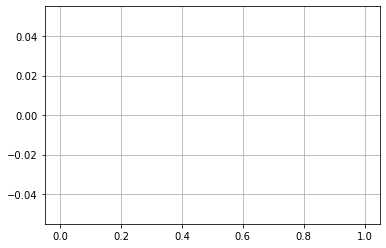

In [25]:
df[df.churn=='Yes'].total_charges.hist()


<AxesSubplot:>

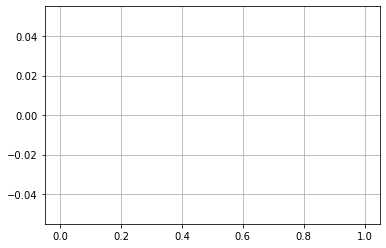

In [26]:
df[df.churn=='No'].total_charges.hist()

<AxesSubplot:>

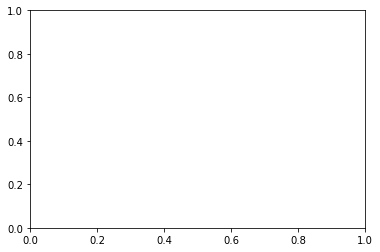

In [27]:
sns.histplot(data=df,x=df[df.churn=='No'].total_charges)

<AxesSubplot:>

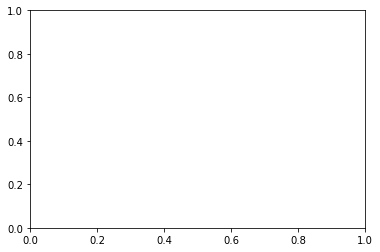

In [28]:
sns.histplot(data=df,x=df[df.churn=='Yes'].total_charges)

What are the average monthly_charges and total_charges of churned customers?

In [40]:
df[df['churn']==1].monthly_charges.mean()

74.44133226324232

In [41]:
df[df['churn']==1].total_charges.mean()

2116.459015516319

In [42]:
df[df['churn']==0].monthly_charges.mean()

61.2651236954001

In [39]:
df[df['churn']==0].total_charges.mean()

3648.4576343254753

In [33]:
df.addons.value_counts()

1    1701
2    1188
3     965
4     922
5     908
6     676
7     395
8     208
0      80
Name: addons, dtype: int64

In [34]:
df[df['addons']>3].monthly_charges.mean()

88.54675136699905

In [35]:
df[df['addons']<=3].monthly_charges.mean()

45.96460345704116

Do customers with higher monthly_charges churn at a different rate?

In [43]:
monthly_avg = df.monthly_charges.mean()
above_avg = df[df['monthly_charges']>monthly_avg].churn.mean()
below_avg = df[df['monthly_charges']<monthly_avg].churn.mean()
monthly_avg, above_avg, below_avg

(64.7616924605992, 0.3453989293907724, 0.16474358974358974)

<AxesSubplot:>

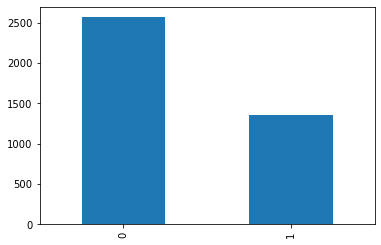

In [62]:
df[df['monthly_charges']>monthly_avg].churn.value_counts().plot.bar()


<AxesSubplot:>

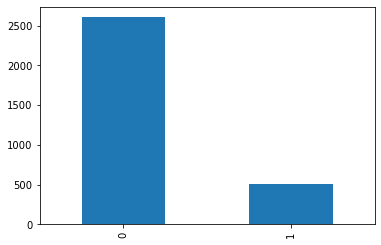

In [63]:
df[df['monthly_charges']<monthly_avg].churn.value_counts().plot.bar()

<AxesSubplot:title={'center':'Less than Avg'}>

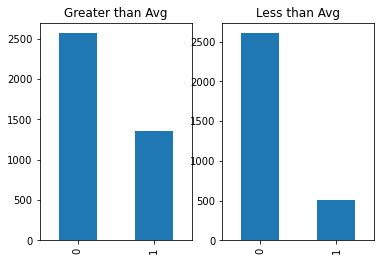

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df[df['monthly_charges']>monthly_avg].churn.value_counts().plot(ax=axes[0], kind='bar',title='Greater than Avg')
df[df['monthly_charges']<monthly_avg].churn.value_counts().plot(ax=axes[1], kind='bar',title='Less than Avg')